<a href="https://colab.research.google.com/github/Alfianfakh/Data-Mining-Course/blob/main/Project1_AlfianFakhrezi_DATAMINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
from imblearn.over_sampling import SMOTE

#Read Data

In [ ]:
#MENGGABUNGKAN SEMUA FILE CSV
import glob

# List semua file CSV
files = glob.glob('*.csv')

dfs = []

for file in files:
    dfs.append(pd.read_csv(file))

df_combined = pd.concat(dfs, ignore_index=True)

#df_combined.to_csv('combined_file.csv', index=False)


In [ ]:
df = df_combined

In [ ]:
#df = pd.read_csv('/content/combined_file.csv')

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4192,4193,4194,4195,4196,4197,4198,4199,Mean_NBP_Sys,Mean_NBP_Dias
0,1.698925,1.691105,1.682307,1.672532,1.665689,1.660802,1.653959,1.647116,1.641251,1.635386,...,2.566960,2.507331,2.444770,2.378299,2.307918,2.233627,2.158358,2.082111,95.459603,53.603550
1,1.086999,1.118280,1.181818,1.285435,1.431085,1.614858,1.826979,2.052786,2.274682,2.479961,...,1.101662,1.146628,1.226784,1.346041,1.475073,1.618768,1.799609,1.998045,127.086237,64.711564
2,0.393939,0.417400,0.439883,0.465298,0.489736,0.514174,0.537634,0.560117,0.580645,0.599218,...,0.395894,0.393939,0.391984,0.391007,0.391007,0.391984,0.395894,0.401760,101.966686,59.802613
3,2.157380,2.116325,2.076246,2.038123,2.006843,1.983382,1.963832,1.948192,1.938416,1.933529,...,1.708700,1.690127,1.672532,1.655914,1.642229,1.627566,1.614858,1.604106,121.720038,75.690267
4,2.684262,2.608993,2.540567,2.473118,2.404692,2.334311,2.264907,2.197458,2.131965,2.069404,...,1.204301,1.173998,1.143695,1.114370,1.085044,1.055718,1.027370,1.000000,114.909305,61.397628


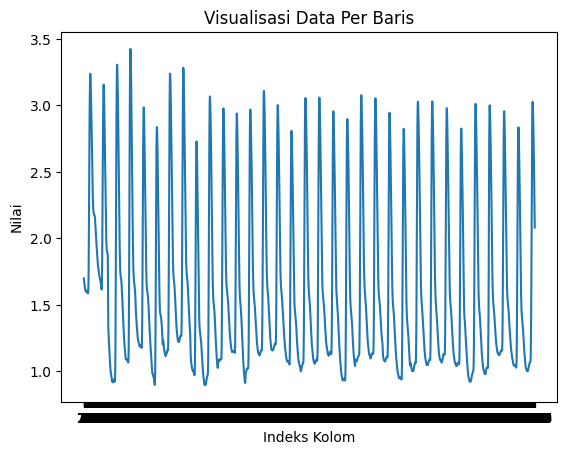

In [ ]:
import matplotlib.pyplot as plt

# Ambil baris pertama sebagai contoh
row = df.iloc[0, :-2]  # Ambil semua kolom kecuali dua kolom terakhir

plt.plot(row)

# Menambahkan label sumbu dan judul
plt.xlabel('Indeks Kolom')
plt.ylabel('Nilai')
plt.title('Visualisasi Data Per Baris')

# Menampilkan plot
plt.show()


# Stat Desc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Columns: 4202 entries, 0 to Mean_NBP_Dias
dtypes: float64(4202)
memory usage: 1.7 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,54.0,1.031910,0.772118,0.164223,0.399020,0.637295,1.528837,2.900293
1,54.0,1.028811,0.766763,0.161290,0.406863,0.629469,1.598729,2.920821
2,54.0,1.026817,0.761899,0.159335,0.407047,0.631373,1.625122,2.928641
3,54.0,1.026128,0.757500,0.157380,0.394969,0.633333,1.607038,2.923754
4,54.0,1.027141,0.754359,0.155425,0.406863,0.631373,1.576002,2.908113
...,...,...,...,...,...,...,...,...
4197,54.0,0.969867,0.723765,0.133920,0.404902,0.584314,1.501955,3.183773
4198,54.0,0.967148,0.721710,0.133920,0.405882,0.576471,1.499511,3.173998
4199,54.0,0.965062,0.720546,0.133920,0.403280,0.574510,1.486804,3.154448
Mean_NBP_Sys,54.0,116.362132,13.076672,87.666667,109.325368,114.284582,123.381396,164.577621


In [ ]:
# Statistik deskriptif
descriptive_stats = df['Mean_NBP_Sys'].describe()
print(descriptive_stats)

count     54.000000
mean     116.362132
std       13.076672
min       87.666667
25%      109.325368
50%      114.284582
75%      123.381396
max      164.577621
Name: Mean_NBP_Sys, dtype: float64


In [ ]:
# Statistik deskriptif
descriptive_stats = df['Mean_NBP_Dias'].describe()
print(descriptive_stats)

count    54.000000
mean     60.156387
std       9.340074
min      39.291667
25%      54.346999
50%      61.592166
75%      65.464487
max      77.899401
Name: Mean_NBP_Dias, dtype: float64


# DATA PreProcessing

## Data Cleaning

### Missing Value

In [ ]:
print(df.isnull().sum())

0                0
1                0
2                0
3                0
4                0
                ..
4197             0
4198             0
4199             0
Mean_NBP_Sys     0
Mean_NBP_Dias    0
Length: 4202, dtype: int64


###Duplicate Value

In [ ]:
print(df.duplicated().sum())

0


### Handling Outlier

In [ ]:
df_outlier = df

#### Cek outlier

In [ ]:
def cekoutlier(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  outlier = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
  return outlier

In [ ]:
#cek jumlah outlier pada setiap kolom
cekoutlier(df_outlier).sum()

0                0
1                0
2                0
3                0
4                0
                ..
4197             1
4198             1
4199             1
Mean_NBP_Sys     3
Mean_NBP_Dias    0
Length: 4202, dtype: int64

#### Handling outlier

In [ ]:
# Hitung IQR
Q1 = df_outlier['Mean_NBP_Sys'].quantile(0.25)
Q3 = df_outlier['Mean_NBP_Sys'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df_outlier[(df_outlier['Mean_NBP_Sys'] >= lower_bound) & (df_outlier['Mean_NBP_Sys'] <= upper_bound)]


In [ ]:
cekoutlier(df_outlier).sum()

0                0
1                0
2                0
3                0
4                0
                ..
4197             1
4198             1
4199             1
Mean_NBP_Sys     0
Mean_NBP_Dias    0
Length: 4202, dtype: int64

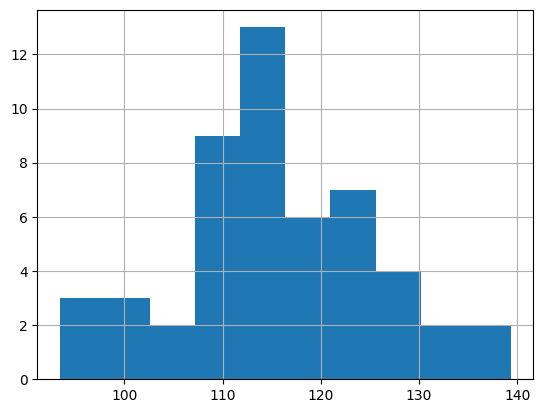

In [ ]:
df_outlier['Mean_NBP_Sys'].hist()
plt.show()

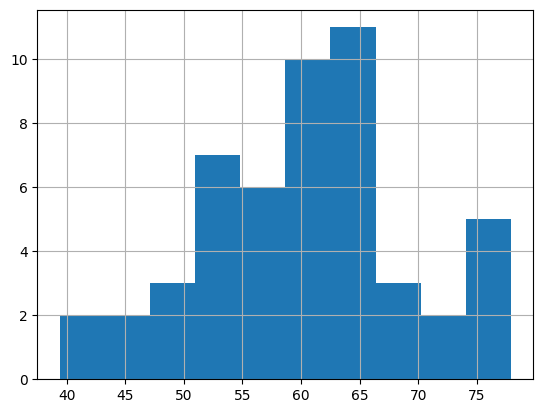

In [ ]:
df_outlier['Mean_NBP_Dias'].hist()
plt.show()

#Data Split

In [ ]:
data_train = df_outlier

In [ ]:
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,4192,4193,4194,4195,4196,4197,4198,4199,Mean_NBP_Sys,Mean_NBP_Dias
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.005883,1.004230,1.003786,1.004627,1.007157,1.010318,1.014592,1.019210,1.024117,1.028716,...,0.968858,0.963796,0.959154,0.955913,0.953265,0.950923,0.949405,0.948578,115.426062,60.400387
std,0.768413,0.765454,0.762812,0.760459,0.759144,0.759694,0.762150,0.767663,0.774687,0.783127,...,0.734715,0.730820,0.727691,0.724837,0.722680,0.721290,0.721244,0.722085,10.073501,9.109761
min,0.164223,0.161290,0.159335,0.157380,0.155425,0.153470,0.153470,0.153470,0.152493,0.151515,...,0.134897,0.134897,0.134897,0.134897,0.134897,0.133920,0.133920,0.133920,93.423299,39.426504
25%,0.395009,0.398039,0.396078,0.388149,0.392157,0.396078,0.403922,0.396078,0.390196,0.390196,...,0.394026,0.393048,0.392071,0.393451,0.394031,0.395992,0.399908,0.398919,109.650735,54.371683
50%,0.635294,0.627566,0.614858,0.600196,0.583578,0.565982,0.549020,0.560117,0.580645,0.599218,...,0.576471,0.572549,0.565982,0.564706,0.560784,0.556863,0.552941,0.541176,113.842102,61.554562
75%,1.527859,1.570870,1.582600,1.564027,1.556696,1.610459,1.582111,1.552786,1.572336,1.585533,...,1.374389,1.382209,1.398827,1.432551,1.453079,1.478983,1.476051,1.465298,123.177778,65.645250
max,2.900293,2.920821,2.928641,2.923754,2.908113,2.882698,2.847507,2.802542,2.747801,2.686217,...,3.135875,3.149560,3.165200,3.177908,3.184751,3.183773,3.173998,3.154448,139.349820,77.899401


In [ ]:
X = data_train[['Mean_NBP_Sys', 'Mean_NBP_Dias']]
y_systolic = data_train['Mean_NBP_Sys']
y_diastolic = data_train['Mean_NBP_Dias']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(X)
X_train, X_test, y_systolic_train, y_systolic_test, y_diastolic_train, y_diastolic_test = train_test_split(X, y_systolic, y_diastolic, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#MODEL

## Linier Regresion

In [ ]:
from sklearn.linear_model import LinearRegression

lr_systolic = LinearRegression()
lr_systolic.fit(X_train, y_systolic_train)

lr_diastolic = LinearRegression()
lr_diastolic.fit(X_train, y_diastolic_train)

LinearRegression()

In [ ]:
# Prediction
y_systolic_pred_lr = lr_systolic.predict(X_test)
y_diastolic_pred_lr = lr_diastolic.predict(X_test)

### Evaluasi Systolic

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, median_absolute_error

#RMSE
print("Linear Regression Systolic RMSE:", np.sqrt(mean_squared_error(y_systolic_test, y_systolic_pred_lr)))

#R2
print("Linear Regression Systolic R2:", r2_score(y_systolic_test, y_systolic_pred_lr))

# Mean Absolute Error (MAE)
print("Linear Regression Systolic MAE:", mean_absolute_error(y_systolic_test, y_systolic_pred_lr))

# Mean Squared Logarithmic Error (MSLE)
print("Linear Regression Systolic MSLE:", mean_squared_log_error(y_systolic_test, y_systolic_pred_lr))

# Mean Absolute Percentage Error (MAPE)
mape_sys = np.mean(np.abs((y_systolic_test - y_systolic_pred_lr) / y_systolic_test)) * 100
print("Linear Regression Systolic MAPE:", mape_sys)

# Median Absolute Error (MedAE)
print("Linear Regression Systolic MedAE:", median_absolute_error(y_systolic_test, y_systolic_pred_lr))

Linear Regression Systolic RMSE: 1.4842753667696044e-14
Linear Regression Systolic R2: 1.0
Linear Regression Systolic MAE: 1.2918958832001821e-14
Linear Regression Systolic MSLE: 0.0
Linear Regression Systolic MAPE: 1.1057362388726618e-14
Linear Regression Systolic MedAE: 1.4210854715202004e-14


### Evaluasi diastolic

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, median_absolute_error

#RMSE
print("Linear Regression Diastolic RMSE:", np.sqrt(mean_squared_error(y_diastolic_test, y_diastolic_pred_lr)))

#R2
print("Linear Regression Diastolic R2:", r2_score(y_diastolic_test, y_diastolic_pred_lr))

# Mean Absolute Error (MAE)
print("Linear Regression Diastolic MAE:", mean_absolute_error(y_diastolic_test, y_diastolic_pred_lr))

# Mean Squared Logarithmic Error (MSLE)
print("Linear Regression Diastolic MSLE:", mean_squared_log_error(y_diastolic_test, y_diastolic_pred_lr))

# Mean Absolute Percentage Error (MAPE)
mape_sys = np.mean(np.abs((y_diastolic_test - y_diastolic_pred_lr) / y_diastolic_test)) * 100
print("Linear Regression Diastolic MAPE:", mape_sys)

# Median Absolute Error (MedAE)
print("Linear Regression Diastolic MedAE:", median_absolute_error(y_diastolic_test, y_diastolic_pred_lr))

Linear Regression Diastolic RMSE: 0.0
Linear Regression Diastolic R2: 1.0
Linear Regression Diastolic MAE: 0.0
Linear Regression Diastolic MSLE: 0.0
Linear Regression Diastolic MAPE: 0.0
Linear Regression Diastolic MedAE: 0.0


## Support Vector Regresor

In [ ]:
from sklearn.svm import SVR

# Model SVM untuk tekanan darah sistolik
svm_systolic = SVR(kernel='linear')
svm_systolic.fit(X_train, y_systolic_train)

# Model SVM untuk tekanan darah diastolik
svm_diastolic = SVR(kernel='linear')
svm_diastolic.fit(X_train, y_diastolic_train)

# Prediksi
y_systolic_pred_svm = svm_systolic.predict(X_test)
y_diastolic_pred_svm = svm_diastolic.predict(X_test)


### Evaluasi Systolic

In [ ]:
from sklearn.metrics import r2_score

# RMSE
print("SVM Systolic RMSE:", np.sqrt(mean_squared_error(y_systolic_test, y_systolic_pred_svm)))

# R2
print("SVM Systolic R2:", r2_score(y_systolic_test, y_systolic_pred_svm))

# Mean Absolute Error (MAE)
print("SVM Systolic MAE:", mean_absolute_error(y_systolic_test, y_systolic_pred_svm))

# Mean Squared Logarithmic Error (MSLE)
print("SVM Systolic MSLE:", mean_squared_log_error(y_systolic_test, y_systolic_pred_svm))

# Mean Absolute Percentage Error (MAPE)
mape_svm = np.mean(np.abs((y_systolic_test - y_systolic_pred_svm) / y_systolic_test)) * 100
print("SVM Systolic MAPE:", mape_svm)

# Median Absolute Error (MedAE)
print("SVM Systolic MedAE:", median_absolute_error(y_systolic_test, y_systolic_pred_svm))


SVM Systolic RMSE: 0.06437425860758228
SVM Systolic R2: 0.9999411908501604
SVM Systolic MAE: 0.049582243963496614
SVM Systolic MSLE: 3.544380124358821e-07
SVM Systolic MAPE: 0.04510612652016786
SVM Systolic MedAE: 0.032497298243058026


### Evaluasi Diastolic

In [ ]:
# RMSE
print("SVM Diastolic RMSE:", np.sqrt(mean_squared_error(y_diastolic_test, y_diastolic_pred_svm)))

# R2
print("SVM Diastolicc R2:", r2_score(y_diastolic_test, y_diastolic_pred_svm))

# Mean Absolute Error (MAE)
print("SVM Diastolic MAE:", mean_absolute_error(y_diastolic_test, y_diastolic_pred_svm))

# Mean Squared Logarithmic Error (MSLE)
print("SVM Diastolic MSLE:", mean_squared_log_error(y_diastolic_test, y_diastolic_pred_svm))

# Mean Absolute Percentage Error (MAPE)
mape_svm = np.mean(np.abs((y_diastolic_test - y_diastolic_pred_svm) / y_diastolic_test)) * 100
print("SVM Diastolic MAPE:", mape_svm)

# Median Absolute Error (MedAE)
print("SVM Diastolic MedAE:", median_absolute_error(y_diastolic_test, y_diastolic_pred_svm))


SVM Diastolic RMSE: 0.06762078091910442
SVM Diastolicc R2: 0.9999123365208337
SVM Diastolic MAE: 0.05476375784274203
SVM Diastolic MSLE: 1.5377836037181148e-06
SVM Diastolic MAPE: 0.10009656876396811
SVM Diastolic MedAE: 0.05134026777218281


## Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Model Decision Tree untuk tekanan darah sistolik
dt_systolic = DecisionTreeRegressor(random_state=42)
dt_systolic.fit(X_train, y_systolic_train)

# Model Decision Tree untuk tekanan darah diastolik
dt_diastolic = DecisionTreeRegressor(random_state=42)
dt_diastolic.fit(X_train, y_diastolic_train)

# Prediksi
y_systolic_pred_dt = dt_systolic.predict(X_test)
y_diastolic_pred_dt = dt_diastolic.predict(X_test)


### Evaluasi Systolic

In [ ]:
# Evaluasi metrik untuk tekanan darah sistolik dengan model Decision Tree
print("Decision Tree Regression Systolic RMSE:", np.sqrt(mean_squared_error(y_systolic_test, y_systolic_pred_dt)))
print("Decision Tree Regression Systolic R2:", r2_score(y_systolic_test, y_systolic_pred_dt))
print("Decision Tree Regression Systolic MAE:", mean_absolute_error(y_systolic_test, y_systolic_pred_dt))
print("Decision Tree Regression Systolic MSLE:", mean_squared_log_error(y_systolic_test, y_systolic_pred_dt))
mape_systolic_dt = np.mean(np.abs((y_systolic_test - y_systolic_pred_dt) / y_systolic_test)) * 100
print("Decision Tree Regression Systolic MAPE:", mape_systolic_dt)
print("Decision Tree Regression Systolic MedAE:", median_absolute_error(y_systolic_test, y_systolic_pred_dt))



Decision Tree Regression Systolic RMSE: 0.5837560642592371
Decision Tree Regression Systolic R2: 0.9951640340885572
Decision Tree Regression Systolic MAE: 0.4300866039394926
Decision Tree Regression Systolic MSLE: 2.811101064595344e-05
Decision Tree Regression Systolic MAPE: 0.3842450082490113
Decision Tree Regression Systolic MedAE: 0.2375551903990214


### Evaluasi Diastolic

In [ ]:

# Evaluasi metrik untuk tekanan darah diastolik dengan model Decision Tree
print("Decision Tree Regression Diastolic RMSE:", np.sqrt(mean_squared_error(y_diastolic_test, y_diastolic_pred_dt)))
print("Decision Tree Regression Diastolic R2:", r2_score(y_diastolic_test, y_diastolic_pred_dt))
print("Decision Tree Regression Diastolic MAE:", mean_absolute_error(y_diastolic_test, y_diastolic_pred_dt))
print("Decision Tree Regression Diastolic MSLE:", mean_squared_log_error(y_diastolic_test, y_diastolic_pred_dt))

mape_diastolic_dt = np.mean(np.abs((y_diastolic_test - y_diastolic_pred_dt) / y_diastolic_test)) * 100
print("Decision Tree Regression Diastolic MAPE:", mape_diastolic_dt)

print("Decision Tree Regression Diastolic MedAE:", median_absolute_error(y_diastolic_test, y_diastolic_pred_dt))

Decision Tree Regression Diastolic RMSE: 0.7300359761814481
Decision Tree Regression Diastolic R2: 0.9897824478178748
Decision Tree Regression Diastolic MAE: 0.5974221828216684
Decision Tree Regression Diastolic MSLE: 0.0001767816120045204
Decision Tree Regression Diastolic MAPE: 1.0772348262459401
Decision Tree Regression Diastolic MedAE: 0.5216534009737899


## KNeighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Model KNN untuk tekanan darah sistolik
knn_systolic = KNeighborsRegressor(n_neighbors=5)  # Tentukan jumlah tetangga yang diinginkan
knn_systolic.fit(X_train, y_systolic_train)

# Model KNN untuk tekanan darah diastolik
knn_diastolic = KNeighborsRegressor(n_neighbors=5)  # Tentukan jumlah tetangga yang diinginkan
knn_diastolic.fit(X_train, y_diastolic_train)

# Prediksi
y_systolic_pred_knn = knn_systolic.predict(X_test)
y_diastolic_pred_knn = knn_diastolic.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error

# Evaluasi metrik untuk tekanan darah sistolik
print("KNN Systolic RMSE:", np.sqrt(mean_squared_error(y_systolic_test, y_systolic_pred_knn)))
print("KNN Systolic R2:", r2_score(y_systolic_test, y_systolic_pred_knn))
print("KNN Systolic MAE:", mean_absolute_error(y_systolic_test, y_systolic_pred_knn))
print("KNN Systolic MSLE:", mean_squared_log_error(y_systolic_test, y_systolic_pred_knn))

mape_systolic_knn = np.mean(np.abs((y_systolic_test - y_systolic_pred_knn) / y_systolic_test)) * 100
print("KNN Systolic MAPE:", mape_systolic_knn)

print("KNN Systolic MedAE:", median_absolute_error(y_systolic_test, y_systolic_pred_knn))


KNN Systolic RMSE: 2.4253041673490983
KNN Systolic R2: 0.9165256883403863
KNN Systolic MAE: 1.62829083342945
KNN Systolic MSLE: 0.0005215149767754577
KNN Systolic MAPE: 1.5284015211873676
KNN Systolic MedAE: 0.7889617984078114


In [ ]:

# Evaluasi metrik untuk tekanan darah diastolik
print("KNN Diastolic RMSE:", np.sqrt(mean_squared_error(y_diastolic_test, y_diastolic_pred_knn)))
print("KNN Diastolic R2:", r2_score(y_diastolic_test, y_diastolic_pred_knn))
print("KNN Diastolic MAE:", mean_absolute_error(y_diastolic_test, y_diastolic_pred_knn))
print("KNN Diastolic MSLE:", mean_squared_log_error(y_diastolic_test, y_diastolic_pred_knn))

mape_diastolic_knn = np.mean(np.abs((y_diastolic_test - y_diastolic_pred_knn) / y_diastolic_test)) * 100
print("KNN Diastolic MAPE:", mape_diastolic_knn)

print("KNN Diastolic MedAE:", median_absolute_error(y_diastolic_test, y_diastolic_pred_knn))


KNN Diastolic RMSE: 2.2295467268246525
KNN Diastolic R2: 0.9047003081292867
KNN Diastolic MAE: 1.68695333684708
KNN Diastolic MSLE: 0.0015992562261469107
KNN Diastolic MAPE: 3.045684517057067
KNN Diastolic MedAE: 1.3277739151391046


#Evaluasi Model

## Systolic

In [ ]:

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error

# Daftar model dan hasil prediksi
models = ["Linear Regression", "SVR", "KNN"]
predictions = [y_systolic_pred_lr, y_systolic_pred_svm, y_systolic_pred_knn]
test_targets = [y_systolic_test, y_systolic_test, y_systolic_test, y_systolic_test]

# Inisialisasi dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

# Evaluasi metrik untuk setiap model
for model_name, y_pred, y_true in zip(models, predictions, test_targets):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    msle = mean_squared_log_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    medae = median_absolute_error(y_true, y_pred)

    evaluation_results[model_name] = {"RMSE": rmse, "R2": r2, "MAE": mae, "MSLE": msle, "MAPE": mape, "MedAE": medae}

df_results = pd.DataFrame(evaluation_results).T

# Tampilkan DataFrame
print(df_results)

                           RMSE        R2           MAE          MSLE  \
Linear Regression  1.484275e-14  1.000000  1.291896e-14  0.000000e+00   
SVR                6.437426e-02  0.999941  4.958224e-02  3.544380e-07   
KNN                2.425304e+00  0.916526  1.628291e+00  5.215150e-04   

                           MAPE         MedAE  
Linear Regression  1.105736e-14  1.421085e-14  
SVR                4.510613e-02  3.249730e-02  
KNN                1.528402e+00  7.889618e-01  


## Diastolic

In [ ]:
# Daftar model dan hasil prediksi untuk tekanan darah diastolik
models = ["Linear Regression", "SVR", "KNN"]
predictions = [y_diastolic_pred_lr, y_diastolic_pred_svm, y_diastolic_pred_knn]
test_targets = [y_diastolic_test, y_diastolic_test, y_diastolic_test]

# Inisialisasi dictionary untuk menyimpan hasil evaluasi untuk tekanan darah diastolik
evaluation_results_diastolic = {}

# Evaluasi metrik untuk setiap model pada tekanan darah diastolik
for model_name, y_pred, y_true in zip(models, predictions, test_targets):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    msle = mean_squared_log_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    medae = median_absolute_error(y_true, y_pred)

    evaluation_results_diastolic[model_name] = {"RMSE": rmse, "R2": r2, "MAE": mae, "MSLE": msle, "MAPE": mape, "MedAE": medae}

# Buat DataFrame dari dictionary hasil evaluasi tekanan darah diastolik
df_results_diastolic = pd.DataFrame(evaluation_results_diastolic).T

# Tampilkan DataFrame
print(df_results_diastolic)


                       RMSE        R2       MAE      MSLE      MAPE     MedAE
Linear Regression  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000
SVR                0.067621  0.999912  0.054764  0.000002  0.100097  0.051340
KNN                2.229547  0.904700  1.686953  0.001599  3.045685  1.327774
